### EDA: Chicago Food Inspections 
**Risk & Map**   

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [15]:
from matplotlib.ticker import FuncFormatter

def number_formatter(number, pos=None):
    """ Convert a number into a human readable format. """
    magnitude = 0
    while abs(number) >= 1000:
        magnitude += 1
        number /= 1000.0
    return '%.1f%s' % (number, ['', 'K', 'M', 'B', 'T', 'Q'][magnitude])


def int_formatter(number, pos=None):
    return int(number)

In [4]:
datos = pd.read_csv("/Users/anatorres/Downloads/Food_Inspections.csv")

In [55]:
datos.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2472391,PHILZ COFFEE,PHILZ COFFEE,2766979.0,NaN,Risk 2 (Medium),1555 N WELLS ST,CHICAGO,IL,60610.0,01/07/21,License,Not Ready,NaN,41.910736,-87.634551,"(-87.63455069145124, 41.910736031820235)"
1,2453551,BIAN,BIAN,2744753.0,Restaurant,Risk 1 (High),600 W CHICAGO AVE,CHICAGO,IL,60654.0,10/20/2020,License,Pass,NaN,41.896585,-87.642996,"(-87.64299618172501, 41.896585191199556)"
2,2386633,JIN JU,JIN JU,27137.0,Restaurant,Risk 1 (High),5203 N CLARK ST,CHICAGO,IL,60640.0,08/28/2020,Canvass,No Entry,NaN,41.976301,-87.668276,"(-87.66827593789948, 41.97630115368914)"
3,2386595,LA BIZNAGA #2,LA BIZNAGA #2,2708992.0,NaN,Risk 1 (High),2949 W BELMONT AVE,CHICAGO,IL,60618.0,08/27/2020,Complaint,No Entry,NaN,41.939256,-87.702270,"(-87.70226967930802, 41.939255926667535)"
4,2386523,MC DONALD'S,MC DONALD'S,2560785.0,Restaurant,Risk 2 (Medium),6336 S ASHLAND AVE,CHICAGO,IL,60636.0,08/26/2020,Short Form Complaint,Pass,NaN,41.778361,-87.664337,"(-87.66433686342792, 41.77836097603761)"


**Risk**

In [33]:
riesgo = datos.groupby(['Risk'],as_index=False)['Inspection ID'].count()\
                                .rename(columns={"Inspection ID": 'registros'})

In [38]:
riesgo['proporcion'] = 100*riesgo['registros']/riesgo['registros'].sum()

In [39]:
riesgo

,Risk,registros,proporcion
0,All,29,0.013485
1,Risk 1 (High),153869,71.546677
2,Risk 2 (Medium),41978,19.519113
3,Risk 3 (Low),19185,8.920725


/Users/anatorres/.pyenv/versions/dpa/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


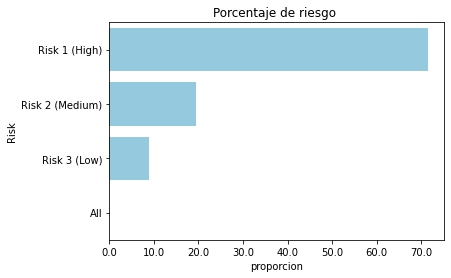

In [50]:
a = sns.barplot(x='proporcion',
                y='Risk',
                data=riesgo.sort_values(by="proporcion", ascending=False),
                color="skyblue"
                )

a.set_title("Porcentaje de riesgo ")
a.set_xticklabels(a.get_xticklabels())
a.xaxis.set_major_formatter(FuncFormatter(number_formatter))

En esta gráfica se observa que el 71% de los establecimientos cuentan con un riesgo alto de no pasar la inspección, el 20% de los establecimientos tienen un riesgo medio y el 9% tienen un riesgo bajo. Finalmente, notamos que 29 establecimientos están catalogados con riesgo "Todos"; analizando estos establecimientos notamos lo siguiente

**Resultado:**

* 13 no tenían resultado aún.
* 6 de los establecimientos estaban fuera de servicio
* 5 establecimientos no pasaron la inspección
* 4 no se le dio entrada a los inspectores
* 1 establecimiento no se ubicó.

**Tipo establecimiento:**

* 8 establecimientos son restaurantes 
* 2 establecimientos son tiendas de abarrotes
* de los 19 establecimientos restantes no se tiene información. 

**Ciudad**

Los 29 establecimientos se ubican en la ciudad de Chicago.

**Violaciones**

No se tiene información del tipo de violación que cuenta cada establecimiento.

**Tipo de inspección** 

* 20 establecimientos son de tipo 'licencia'
* 7 establecimientos de tipo 'sondeo'
* 1 establecimiento de tipo 'queja'
* 1 establecimiento tiene tipo de inspección 'propietario suspendio operación/licencia'

**Mapa**